<a href="https://colab.research.google.com/github/KyraDignazio/KyraDignazio/blob/main/EN/S06_Descriptive_Analytics/S06_LectureEx_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# S6 - Data Visualization
Programming topics covered in this section:
* `seaborn` library (Overview). Tutorial and guide to `seaborn` can be found here: [seaborn link](https://seaborn.pydata.org/tutorial.html)

Examples include:
* Analyzing Cereal sales

---

# `seaborn`

`seaborn` is a Python data visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.


## 1. Importing libraries and Data
To use `seaborn`, we need to import it first. Another library commonly imported with `seaborn` is the `matplotlib.pyplot` library, which is commonly aliased as `plt`. This library is useful for adjusting graphics beyond the simple parameters allowed in the `seaborn` library. Note that `seaborn` is actually built on top of the `matplotlib` library.

Let's import `pandas` since we use this library to manipulate our data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Let's re-load the `salesCerealsOriginal.csv` data that we used in Session 4 when introducing `pandas`, and select the column `WEEK_END_DATE` as the index of the `DataFrame`. 
Here are the descriptions of the variables in this DataFrame. 

| VARIABLE NAME | DESCRIPTION | 
|:----|:----|
|WEEK_END_DATE|week ending date|
|STORE_NUM|store number|
|UPC|(Universal Product Code) product specific identifier|
|UNITS|units sold|
|VISITS|number of unique purchases (baskets) that included the product|
|HHS|# of purchasing households|
|SPEND|total spend (i.e., $ sales)|
|PRICE|actual amount charged for the product at shelf|
|BASE_PRICE|base price of item|
|FEATURE|product was in in-store circular|
|DISPLAY|product was a part of in-store promotional display|
|TPR_ONLY|temporary price reduction only (i.e., shelf tag only, product was reduced in price but not on display or in an advertisement)|
|DESCRIPTION|product description|
|CATEGORY|category of product|
|SUB_CATEGORY|sub-category of product|


To avoid an issue when using the `UPC` column which contains product numbers (`seaborn might consider them to be numeric in some plots`). We also add another column to keep the product code `UPC` in the string format. 

In [2]:
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/EN/S06_Descriptive_Analytics/salesCerealsOriginal.csv'
df_cereal = pd.read_csv(url, parse_dates=['WEEK_END_DATE'])

# Since seaborn may consider the column with numerical value such as UPC as numeric type,
# we create a new column to reformat this column into string by adding "UPC" into it
df_cereal['UPC_string'] = ["UPC"+str(x) for x in df_cereal['UPC']]
df_cereal.head()


,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,UPC_string
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,UPC1111085319
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,UPC1111085350
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027527
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027528
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027564


## 2. Line Plots
The `seaborn` library is able to generate a wide variety of figures. We first explore how to generate line plots using this library.

The function `seaborn.lineplot()` draws a line plot with possibility of several semantic groupings. 

Let's visualize the number of units sold each week for each UPC using line plots.

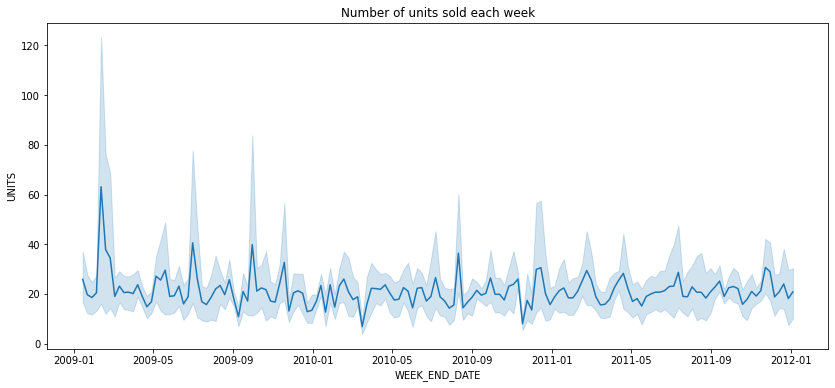

In [3]:
plt.figure(figsize=(14, 6))                                # setting the size of the graph
plt.title('Number of units sold each week')              # Giving a title to the graph
sns.lineplot(data=df_cereal, x='WEEK_END_DATE', y='UNITS')

Note that passing the entire dataset in long-form mode will aggregate over repeated values (each `WEEEK_END_DATE`) to show the mean and 95% confidence interval. It means,  the solid line shows the average sold units among the different types of products (`UPC`). This plot is only useful if the unit size is relatively homogeneous since it will mainly shows the average unit.

If we want to make a plot where each line is the units sold of a UPC over time, we can draw these lines using the parameters `hue`, `size` or `style`. 

* `hue`: differentiates each line with a different color shade
* `size`: differentiates each line with a different weight (e.g., 1pt, 1/4 pt, 1/2 pt)
* `style`: differentiates each line with a different style (e.g., solid, dashed, dot)

The graph below is rather confusing but it gives an idea how the previous graph was created.

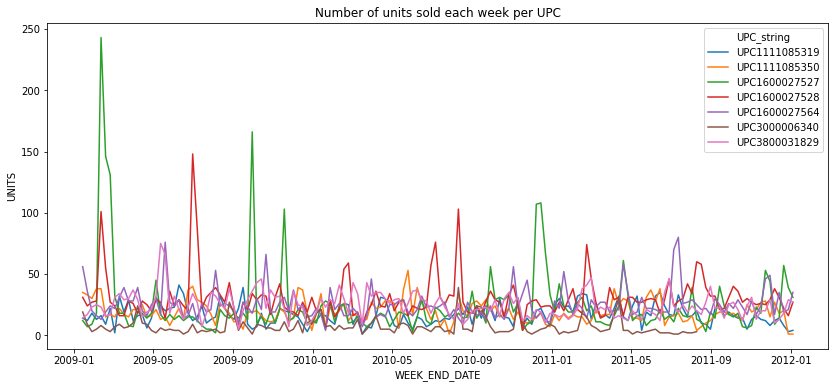

In [4]:
plt.figure(figsize=(14, 6))                                # setting the size of the graph
plt.title('Number of units sold each week per UPC')        # Giving a title to the graph
sns.lineplot(data=df_cereal, x='WEEK_END_DATE', y='UNITS', hue='UPC_string')


Let's take a closer look at the line plot of `UPC` 1600027527, to better see the different peaks it has. We can set this line color to green for consistency. To do this, we slice only the row which contains the product of our interest.

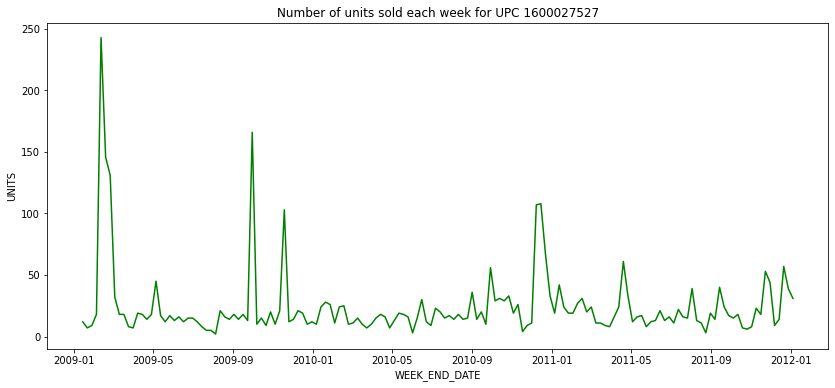

In [5]:
plt.figure(figsize=(14, 6))
plt.title('Number of units sold each week for UPC 1600027527')
df_one_UPC = df_cereal[df_cereal['UPC_string']=='UPC1600027527']
sns.lineplot(data = df_one_UPC, x='WEEK_END_DATE', y='UNITS', color='green')


In [6]:
# computed aggregated sales per UPC and sorted by this value
agg_units = pd.DataFrame(df_cereal.groupby('UPC_string').UNITS.sum())
# we also sort the values by unit
agg_units.sort_values(by='UNITS', ascending=False, inplace=True)
agg_units

,UNITS
UPC_string,
UPC1600027528,4690
UPC1600027564,3871
UPC3800031829,3788
UPC1600027527,3760
UPC1111085350,2994
UPC1111085319,2631
UPC3000006340,945


Now let's put these numbers in a bar graph using the `sns.barplot()` function. Note that here we specify the values in the `x` and `y` axes.

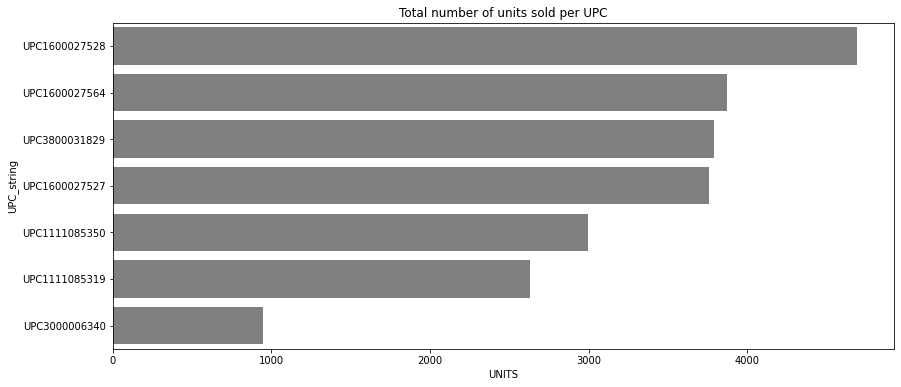

In [7]:
plt.figure(figsize=(14, 6))
plt.title('Total number of units sold per UPC')
sns.barplot(y=agg_units.index, x=agg_units["UNITS"], color = 'grey')

## 3. Scatter Plots
Other popular charts are point clouds (i.e., `scatterplots`). Several of them are offered in `seaborn`.

In this section we will look at the association of discounts with sales (in units). To do this, we first calculate the percent reduction as $ 100 \times \frac{BASE\_PRICE - PRICE}{BASE\_PRICE}$ and add this value as the `MARKDOWN` column in our original dataframe `df_cereal`.

In [8]:
df_cereal['MARKDOWN'] = (df_cereal['BASE_PRICE'] - df_cereal['PRICE']) / df_cereal['BASE_PRICE'] * 100
df_cereal.head()

,WEEK_END_DATE,STORE_NUM,UPC,UNITS,VISITS,HHS,SPEND,PRICE,BASE_PRICE,FEATURE,DISPLAY,TPR_ONLY,DESCRIPTION,CATEGORY,SUB_CATEGORY,UPC_string,MARKDOWN
0,2009-01-14,367,1111085319,14,13,13,26.32,1.88,1.88,0,0,0,PL HONEY NUT TOASTD OATS,COLD CEREAL,ALL FAMILY CEREAL,UPC1111085319,0.000000
1,2009-01-14,367,1111085350,35,27,25,69.30,1.98,1.98,0,0,0,PL BT SZ FRSTD SHRD WHT,COLD CEREAL,ALL FAMILY CEREAL,UPC1111085350,0.000000
2,2009-01-14,367,1600027527,12,10,10,38.28,3.19,3.19,0,0,0,GM HONEY NUT CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027527,0.000000
3,2009-01-14,367,1600027528,31,26,19,142.29,4.59,4.59,0,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027528,0.000000
4,2009-01-14,367,1600027564,56,48,42,152.32,2.72,3.07,1,0,0,GM CHEERIOS,COLD CEREAL,ALL FAMILY CEREAL,UPC1600027564,11.400651


Let's create our scatter plot:

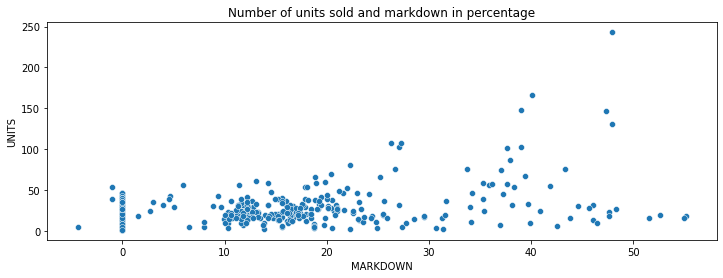

In [9]:
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage')
sns.scatterplot(data=df_cereal, x='MARKDOWN', y='UNITS')

Now let's identify the discounts that match the elements of the flyer and other types of discounts, and see if the associations between `MARKDOWN` and `UNITS` are different.

We can do this by setting `hue = 'FEATURE'`. Remember that `FEATURE` indicates whether the element is in the circular or not.

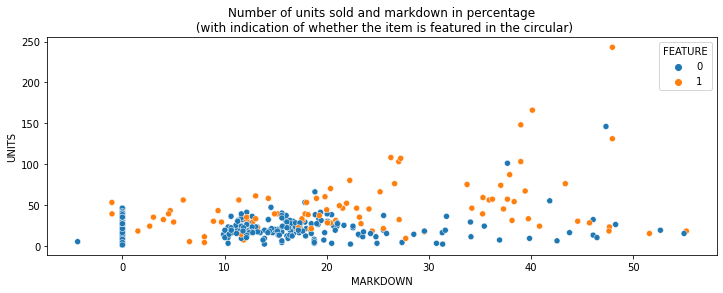

In [10]:
plt.figure(figsize=(12,4))
plt.title('Number of units sold and markdown in percentage\n (with indication of whether'
         ' the item is featured in the circular)')
sns.scatterplot(data=df_cereal, x='MARKDOWN', y='UNITS', hue='FEATURE')

## 4. Heatmaps
Now let's move on to heatmaps. This is useful for representing values on two dimensions (which are often categories).

Let's say we want to check the total sales (in units) on each month for each UPC.

To do this, we must first organize the data. In particular, we need to aggregate the data by month (i.e., we need to calculate the total sales per month for each UPC).

In [ ]:
# lets add a new column to the original dataframe wich indicate the month in which each sale was made
# since the value is in `datetime` format. We can obtain it by using the attribute `.month`
# we can also use the string operation (e.g., slice only the month index from WEEK_END_DATE if needed)
df_cereal['SALE_MONTH'] = [i.month for i in df_cereal['WEEK_END_DATE']]
df_cereal

Now we create a separate dataframe with each UPC value as one column. We also indicate `as_index=False` since by default groupby will create index based on the columns we use to group. Since we use two columns `['SALE_MONTH', 'UPC']`, this will create a muli-index which is difficult to use. Thus, we will not use them as indexes.

In [ ]:
df_cereal_summary = pd.DataFrame(df_cereal.groupby(['SALE_MONTH', 'UPC_string'], as_index=False).UNITS.sum())
df_cereal_summary

Let's manipulate the table using the `.pivot()` function to visualize the data as a matrix. Check [this page](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html) to know more about pivot tables.

In [ ]:
#converting the dataframe into a pivot table
df_cereal_pivot = df_cereal_summary.pivot(index='SALE_MONTH', columns='UPC_string', values='UNITS')   
df_cereal_pivot

We can now draw a heatmap. The parameter `annot=True` indicates that we also want to display the values and `fmt='d'` indicates that the displayed value is in the integer format (also see [heatmap function link](https://seaborn.pydata.org/generated/seaborn.heatmap.html)). You can also indicate the color map (`cmap`). The list of available cmap can be found here [cmap link](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

In [ ]:
plt.figure(figsize = (12,9))
plt.title('Number of units sold per month for each UPC')
plt.ylabel('Month')
sns.heatmap(data=df_cereal_pivot, annot=True, fmt='d', cmap='Oranges')


The `sns.heatmap()` function can also be used to check the correlation between different variables of a `DataFrame`.  This may be useful to explore the data before training a machine learning model (this is the same as the correlation you can see in the pandas-profiling report).

We are using a diverging color palette here because we want values greater than 0 to be a different color than values less than 0. You can also specify the number the colors in the palette by setting the parameter `n` in the `sns.diverging_palette()` function. Check [this page](https://seaborn.pydata.org/tutorial/color_palettes.html#custom-diverging-palettes) and [this page](https://seaborn.pydata.org/generated/seaborn.diverging_palette.html) for more information on how  to create a custom `colormap` for diverging data.

In [ ]:
df_cereal.corr()

In [ ]:
# first we can try with the standard heatmap (with a specified cmap)
plt.figure(figsize = (12,9))
plt.title('Correlation')
sns.heatmap(data=df_cereal.corr(), cmap='Oranges')


In [ ]:
plt.figure(figsize=(14,6))

# Creating a customized palette with 7 colors
custom_cmap = sns.diverging_palette(220, 20, n=7, as_cmap=True)

# Creating the plot 
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.heatmap(df_cereal.corr(),   # specifying the matrix correlation ( pairwise correlation of columns) as the data to plot 
            cmap=custom_cmap,   # specifying our customized palette of colors
            square=True,        # True to set the Axes aspect to “equal” so each cell will be square-shaped.
            vmin=-1., vmax=1., center=0,  # providing the values min/max/center Values to anchor the colormap 
            linewidths=.5,      # creating the white separating lines in the plot
            cbar_kws={"shrink": .5})  # Reduce the size of the color bar

## 5. Distribution Plots
Finally, we present different functions for viewing distributions: **histograms** and **density** plots. 
Let's analyze our data with respect to `MARKDOWN`. 

A first option is to use `sns.distplot()`. Here we use `kde = False` (Kernel Density Estimate); using `kde = True` shows a smooth distribution instead of the raw distribution.

In [ ]:
plt.title('Distribution of markdowns')
sns.distplot(a=df_cereal['MARKDOWN'])


It is also possible to show several distributions on the same figure. It can be done as below.

Note that in every call to `sns.distplot()`, we specify the label to indicate the variable corresponding to the distribution. Then, on the last line, we force the caption to appear.

In [ ]:
sns.distplot(a=df_cereal['MARKDOWN'][df_cereal['FEATURE'] == 0], label='Not in circular')
sns.distplot(a=df_cereal['MARKDOWN'][df_cereal['FEATURE'] == 1], label='In circular')

plt.title('Distribution of markdowns')  # specify the title
plt.legend()  # add labels of data

Finally, it is possible to show the joint distribution of two variables with `sns.jointplot()`.

Here the first distribution is for `MARKDOWN` while the second distribution is for `BASE_PRICE`.

In [ ]:
plt.figure(figsize=(14,6))
sns.jointplot(y=df_cereal['SPEND'], x=df_cereal['MARKDOWN'], hue = df_cereal['FEATURE'], kind='kde')
plt.show()

## 6. Displaying multiple plots.

In some cases, we may want to display multiple plots. This can be done by creating subplots (either in 1 or 2 dimensions) and assign each plot to a subplot. 



In [ ]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 10),sharey=True)
fig.suptitle('Multiple plots')

# first subplot in position [0,0]
df_one_UPC = df_cereal[df_cereal['UPC_string']=='UPC1600027528']
sns.scatterplot(ax=axes[0,0], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue = df_one_UPC['FEATURE'])
axes[0,0].set_title('UPC1600027528')

# first subplot in position [0,1]
df_one_UPC = df_cereal[df_cereal['UPC_string']=='UPC1600027564']
sns.scatterplot(ax=axes[0,1], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue = df_one_UPC['FEATURE'])
axes[0,1].set_title('UPC1600027564')

# first subplot in position [1,0]
df_one_UPC = df_cereal[df_cereal['UPC_string']=='UPC3800031829']
sns.scatterplot(ax=axes[1,0], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue = df_one_UPC['FEATURE'])
axes[1,0].set_title('UPC3800031829')

# first subplot in position [1,1]
df_one_UPC = df_cereal[df_cereal['UPC_string']=='UPC1600027527']
sns.scatterplot(ax=axes[1,1], y=df_one_UPC["UNITS"], x=df_one_UPC["PRICE"], hue = df_one_UPC['FEATURE'])
axes[1,1].set_title('UPC1600027527')